(lecture13:predictive-checking)=
# Predictive checking

We saw how we can build models out of data using the maximum likelihood principle.
How do we know that these models are good?
Well, this is a very tough question to answer.
And, to some extent, it is unanswerable.
It is much easier to see when your model is wrong...
Predictive checking is a way to do exactly that.

Assume that we have built a model using some data, say $x_{1:N}$. 
Now, assume that you do the experiment again under the same conditions. 
What data does your model tell you that you would observe? 
The idea of predictive checking is to:
- use your fitted model to replicate the experimental data, and
- compare their characteristics to the real data. 

You may reject a model that performs very poorly under predictive checking. 
However, you cannot accept a model that performs very well. 
There are other methods for doing this which are more advanced. 
Predictive checking is good for identifying bugs in your code or coming up with ideas to extend the models in a way that better matches the data.

In [28]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

## Visual inspections of replicated data

The idea here is to simply sample $x^{\text{rep}}_{1:N}$ from your fitted model and compare it visually to $x_{1:N}$. 
Let's see this on the coin toss example.

Consider $N$ coin-tosses with probability of heads ($1$) $\theta$, i.e., 

$$
X_{i}|\theta \sim \text{Bernoulli}(\theta).
$$ 

The maximum likelihood estimate of $\theta$ is:

$$
\hat{\theta} = \frac{1}{N}\sum_{i=1}^N.
$$

Now, here is how we can replicate the experiment using our fitted model:
- Sample $x^{\text{rep}_{1:N}}$ independently from a Bernoulli with parameter $\hat{\theta}$ (this is one replication of the experiment).
- Repeat as many times as you want. Each time you get a new replication of the experimental data.

Ok, let's start with a dataset that is 100\% known that it is compatible with the model.
Generate the ground truth data from a fair coin:

In [29]:
theta_true = 0.5
X = st.bernoulli(theta_true)
N = 50
xdata = X.rvs(size=N)
xdata

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1])

Now use MLE for $\theta$:

In [30]:
hat_theta = xdata.mean()
print(f'hat theta = {hat_theta:1.2f}')

hat theta = 0.46


Now that we have fitted the model, let's draw many replicated data $x^{\text{rep}}_{1:N}$ from it and compare them visually to the original dataset.

In [31]:
# Number of replications
N_rep = 9
# Array to store the replicated experiments
# each row is a replication of the experimental data
x_rep = np.ndarray((N_rep, N))
for i in range(N_rep):
    x_rep[i, :] = st.bernoulli(hat_theta).rvs(size=N)
x_rep

array([[1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
        1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        1., 1.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
        0., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
        0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
        0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
        0., 1.],
       [0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        1., 0.],
       [0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 

We can visualize the data as images. The first row of pixels is are the observed data.

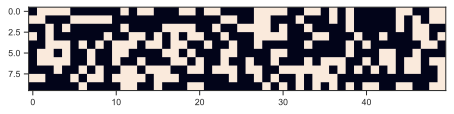

In [32]:
fig, ax = make_full_width_fig()
ax.imshow(np.vstack([xdata, x_rep]));
save_for_book(fig, 'ch13.fig1')

This visual inspection does not reveal anything strange. 
Let's now repeat this excersize with a dataset that is *completely artificial* and does not match the model. 
As a matter of fact, I just picked the dataset by hand!
I just tried to pick an equal number of 0's and 1's.
Can predictive checking reveal that this dataset was not generated by a binary experiment?
Let's see.

Here is the data I came up with:

In [33]:
xdata_2 = np.array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0])

My maximum likelihood estimator for this new coin:

In [34]:
hat_theta2 = xdata_2.mean()
print(f'hat theta 2 = {hat_theta2:1.2f}')

hat theta 2 = 0.50


Let's replicate the experiment 9 times:

In [35]:
x_rep_2 = np.ndarray((N_rep, N))
for i in range(N_rep):
    x_rep_2[i, :] = st.bernoulli(hat_theta2).rvs(size=N)
x_rep_2

array([[0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
        1., 0.],
       [1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
        0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
        1., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
        0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
        1., 0.],
       [0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
        1., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 

And let's visualize the results:

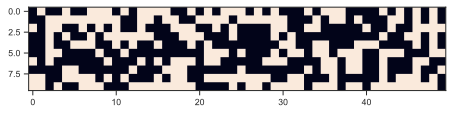

In [36]:
fig, ax = make_full_width_fig()
ax.imshow(np.vstack([xdata_2, x_rep_2]))
save_for_book(fig, 'ch13.fig2')

Does the first row (original data) look similar to the rest of the rows (replicated experiments).
Well, if you pay close attention you will notice that the data I picked by hand has more transitions from heads to tails than the replicated data. 
In other words, the replicated data seem to have longer consecutive series of either heads or tails. 
How can we see this more clearly?

## Test quantities and visual inspections

We use test quantities to characterize the discrepancy between the model and the data. 
In other words, test quantities help us zoom into the characteristsics of the data that are of particular interest to us. 
Mathematically, a test quantity is a scalar function of the data and the model parameters $T(x_{1:n})$. 
There are some general recipies for creating test quantities for regression and classification. 
However, in general, you must use common sense in selecting them. 
What are the important characteristics of the data that your model should be capturing? 
We will be seeing specific examples below.
Now, assume that you have selected one, or more, test quantities. 
What do you do with them? 
Well, the easiest thing to do is a visual comparison of the histogram of the test quantity over replicated data, and compare it to the observe value $T(x_{1:n},\theta)$. 
In these plots you are trying to see how likely or unlikely is the observed test quantity under the assumption that your model is correct.

What are some good test quantities that we can pick for the coin-toss example. 
An obvious one is the number of heads. This is only a function of the data. It is: 

$$
T_{h}(x_{1:n}) = \sum_{i=1}^nx_i.
$$ 

Let's implement this as a Python function of the data:

In [37]:
def T_h(x):
    """This is an implementation of a 
    """
    return x.sum()

We are going to try two datasets: 
- one that was generated from the correct model, and
- one I picked by hand. 

We will see the results that we get from both. 
For the first dataset (the one generated by the model) we get:

The observed test quantity is 23


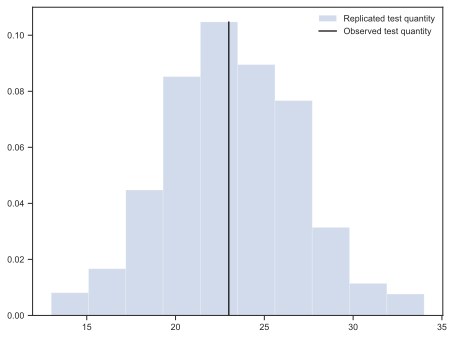

In [38]:
# The observed test quantity
T_h_obs = T_h(xdata)
print(f'The observed test quantity is {T_h_obs:d}')
# Draw replicated data
N_rep = 1000
x_rep = np.ndarray((N_rep, N))
for i in range(N_rep):
    x_rep[i, :] = st.bernoulli(hat_theta).rvs(size=N)
# Evaluate the test quantity
T_h_rep = np.ndarray(x_rep.shape[0])
for i in range(x_rep.shape[0]):
    T_h_rep[i] = T_h(x_rep[i, :])
# Do the plot
fig, ax = make_half_width_fig()
tmp = ax.hist(T_h_rep, density=True, alpha=0.25, label='Replicated test quantity')[0]
ax.plot(T_h_obs * np.ones((50,)), np.linspace(0, tmp.max(), 50), 'k', label='Observed test quantity')
plt.legend(loc='best')
save_for_book(fig, 'ch13.fig3')

Now, let's look also at the other dataset (the one I picked by hand):

The observed test quantity is 25


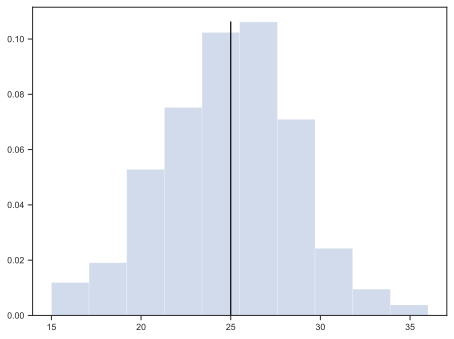

In [39]:
# The observed test quantity
T_h_obs = T_h(xdata_2)
print(f'The observed test quantity is {T_h_obs:d}')
# Draw replicated data
N_rep = 1000
x_rep = np.ndarray((N_rep, N))
for i in range(N_rep):
    x_rep[i, :] = st.bernoulli(hat_theta2).rvs(size=N)
# Evaluate the test quantity
T_h_rep = np.ndarray(x_rep.shape[0])
for i in range(x_rep.shape[0]):
    T_h_rep[i] = T_h(x_rep[i, :])
# Do the plot
fig, ax = make_half_width_fig()
tmp = ax.hist(T_h_rep, density=True, alpha=0.25, label='Replicated test quantity')[0]
ax.plot(T_h_obs * np.ones((50,)), np.linspace(0, tmp.max(), 50), 'k', label='Observed test quantity')
save_for_book(fig, 'ch13.fig4')

It looks about the same. 
This just means that I was able to replicate this particular test quantity when I picked values by hand.
It is not possible to see the difference with this statistic.

Can we find a better test statistic? 
Something that can discriminate between the two data generating processes?
Remember our observation when we plotted the replicated data vs the true data for the second case. 
We observed that my hand-picked data included more transitions from heads to tails. 
I was trying hard to make them look random.
Let's build a statistic that captures that. 
Here is the one I came up with: 

$$
T_s(x) = \text{# number of switches from 0 and 1 in the sequence}\;x.
$$ 

This is not easy to write in an analytical form, but we can program it:

In [40]:
def T_s(x):
    s = 0
    for i in range(1, x.shape[0]):
        if x[i] != x[i-1]:
            s += 1
    return s

Let's look first at the original dataset:

The observed test quantity is 21


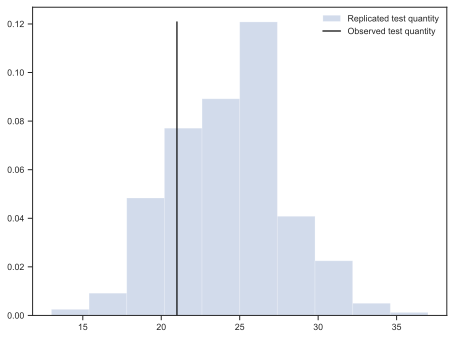

In [41]:
# The observed test quantity
T_s_obs = T_s(xdata)
print(f'The observed test quantity is {T_s_obs:d}')
# Draw replicated data
N_rep = 1000
x_rep = np.ndarray((N_rep, N))
for i in range(N_rep):
    x_rep[i, :] = st.bernoulli(hat_theta).rvs(size=N)
# Evaluate the test quantity
T_s_rep = np.ndarray(x_rep.shape[0])
for i in range(x_rep.shape[0]):
    T_s_rep[i] = T_s(x_rep[i, :])
# Do the plot
fig, ax = make_half_width_fig()
tmp = ax.hist(T_s_rep, density=True, alpha=0.25, label='Replicated test quantity')[0]
ax.plot(T_s_obs * np.ones((50,)), np.linspace(0, tmp.max(), 50), 'k', label='Observed test quantity')
plt.legend(loc='best')
save_for_book(fig, 'ch13.fig5')

This looks okay.

Let's now look at the one I picked by hand:

The observed test quantity is 32


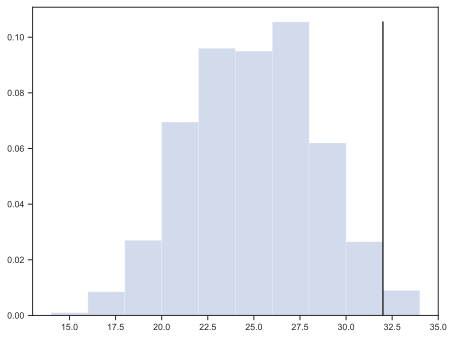

In [42]:
# The observed test quantity
T_s_obs = T_s(xdata_2)
print(f'The observed test quantity is {T_s_obs:d}')
# Draw replicated data
N_rep = 1000
x_rep = np.ndarray((N_rep, N))
for i in range(N_rep):
    x_rep[i, :] = st.bernoulli(hat_theta2).rvs(size=N)
# Evaluate the test quantity
T_s_rep = np.ndarray(x_rep.shape[0])
for i in range(x_rep.shape[0]):
    T_s_rep[i] = T_s(x_rep[i, :])
# Do the plot
fig, ax = make_half_width_fig()
tmp = ax.hist(T_s_rep, density=True, alpha=0.25, label='Replicated test quantity')[0]
ax.plot(T_s_obs * np.ones((50,)), np.linspace(0, tmp.max(), 50), 'k', label='Observed test quantity')
save_for_book(fig, 'ch13.fig6')

Oops... The data are highly unlikely under the assumptions of this model.
You see how predictive checking can help you reveal that there is something fishy with your data.

```{note}
What we did here has connections to the concept of [p-values](https://en.wikipedia.org/wiki/P-value).
However, p-values can be easily [misused](https://amstat.tandfonline.com/doi/pdf/10.1080/00031305.2016.1154108).
The problem is that scientists and engineers tend to use them to automatically reject/accept hypotheses.
Things are a bit more nuanced that the common way people use them.
To do a good job teaching p-values I should devote at least one lecture on them, and this would be at the expense of another topic.
Furthermore, you can do excellent data science without ever using p-values!
These are the reasons why I have chosen not to talk about them.
If you want to learn about p-values, I suggest you take a core statistics course.
```